In [1]:
# Prep the Notebook
from simple_disk import simple_disk
import matplotlib.pyplot as plt
import numpy as np

# Flared Emission Surfaces

In the previous notebooks we have assumed that the disks are geometrically thin, a reasonable assumption for either optically thin lines or nearly face-on disks, such as TW Hya. However, for highly optically thick lines, such as $^{12}$CO, it is possible to spatially resolve the two molecular regions either side of the midplane (see [Rosenfeld et al. 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...774...16R/abstract), for example). In this Notebook we discuss how this is dealt with in `wrinkleology`.

## Assumptions

We continue to assume that disk emission is well described by a 2D surface, but this extended to include two surfaces accounting for the near and far side of the disk. These two emission surfaces are defined by an emission height, $z(r)$ which is parameterised by,

$$z(r) = z_0 \times \left( \frac{r}{100~{\rm au}} \right)^{\psi} + z_1 \times \left( \frac{r}{100~{\rm au}} \right)^{\varphi}$$

where $z_0$ and $\psi$ control vertical extent and flaring, respectively. The second term, described by $z_1$ and $\varphi$, allows for a decrease with radius to capture the drop due to a decreasing surface density, as described in [Teague et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019Natur.574..378T/abstract).

In [2]:
# Now make a simple disk model, with a conical emission surface.
disk = simple_disk(inc=30.0, PA=40.0, mstar=0.2, dV0=150.0, z0=30.0, psi=1.0, Npix=512)

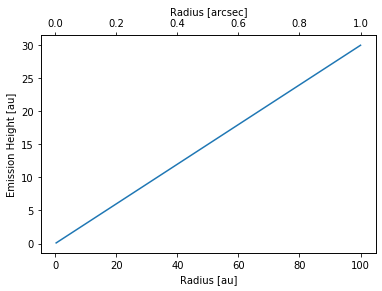

In [3]:
# Plot the emission surface.
disk.plot_emission_surface()

## Making Channel Maps

This is exactly as before, the class will determine if a flared emission surface should be considered or not. The `get_channel` function now calculates the flux for the front side, $F_{\nu,\,{\rm front}}$ and the back side of the disk, $F_{\nu,\,{\rm back}}$. These are combined assuming a simple optical depth description such that,

$$F_{\nu} = F_{\nu,\,{\rm front}}\times\big(1 - \exp(-\tau)\big) + F_{\nu,\,{\rm back}}\times\big(\exp(-\tau)\big)$$

where $\tau$ is assumed to be a radially varying function, discussed below.

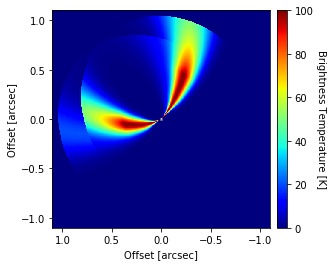

In [4]:
# Plot the channel including the deviation.
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(350, 360),
               extent=disk.extent_sky, origin='lower',
               vmin=0, vmax=100, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)




## Optical Depth

The optical depth, `tau`, is a variable in the same way `Tb` or `dV` is. It can be varied as a power-law function with the variables `tau0`, `tauq` and `taumax` when the class is instantiated. The radial profile can be change with the `set_tau` function. Finally, analogously to the brightness and linewidth profiles, this can be viewed with a radial profile with `plot_tau`. By default this is set to a radially constant value of 5 to approximate an optically thick line.

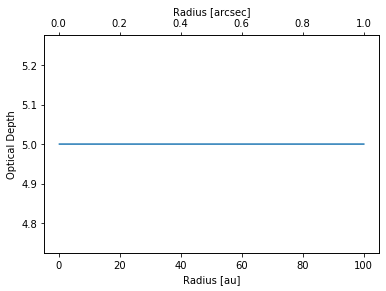

In [5]:
# Plot the radial optical depth profile.
disk.plot_tau()

You can also evalutae what this optical profile looks like in a channel (only for the front side of the disk) with the `get_channel_tau` function. This takes the same arguments as `get_channel`.

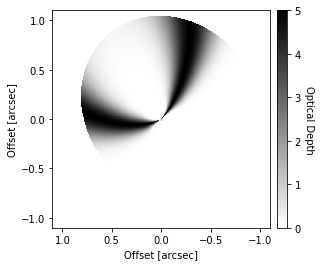

In [6]:
# Plot the channel including the deviation.
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel_tau(350, 360),
               extent=disk.extent_sky, origin='lower',
               vmin=0, vmax=disk.tau.max(), cmap='binary')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Optical Depth', rotation=270, labelpad=13)

## Back Side

The back side of the disk is considered broadly the same as the front, aside from the different deprojection and it taking a different maximum value with `Tbmax_b`. As we see the back side of the disk, we are actually tracing the surface next to the CO freeze-out layer, so a considerably colder region than the top side tracing the atmosphere (see [Pinte et al. 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...609A..47P/abstract) or [Dullemond et al. 2020](https://ui.adsabs.harvard.edu/abs/2020A%26A...633A.137D/abstract), for example). As such this is by default set to 20K, but can be changed by the user to best match their observations.

## Velocity Perturbations

To handle the velocity perturbations, when `z0 != 0.0` the perturbations will return two arrays representing the velocity perturbations for the front and back side of the disk, respectively.

In [7]:
dv = disk.rotational_perturbation(dv=500.0, r0=0.5, t0=1.0, dr=0.05, dt=0.0, projection='sky')
print('Number of components:', len(dv), 'with shape', dv[0].shape)

Number of components: 2 with shape (512, 512)


The `get_channel` and `get_cube` functions will be able to parse these variables directly.

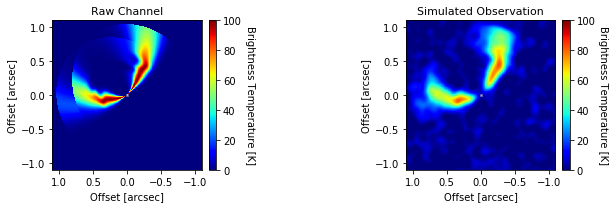

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))

ax = axs[0]
im = ax.imshow(disk.get_channel(v_min=350., v_max=360., dv0=dv),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=100, cmap='jet')
disk.format_sky_plot(ax)
ax.set_title('Raw Channel', fontsize=11)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

ax = axs[1]
im = ax.imshow(disk.get_channel(v_min=350., v_max=360., dv0=dv, bmaj=0.1, rms=3.0),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=100, cmap='jet')
disk.format_sky_plot(ax)
ax.set_title('Simulated Observation', fontsize=11)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

plt.tight_layout()